In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [6]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]

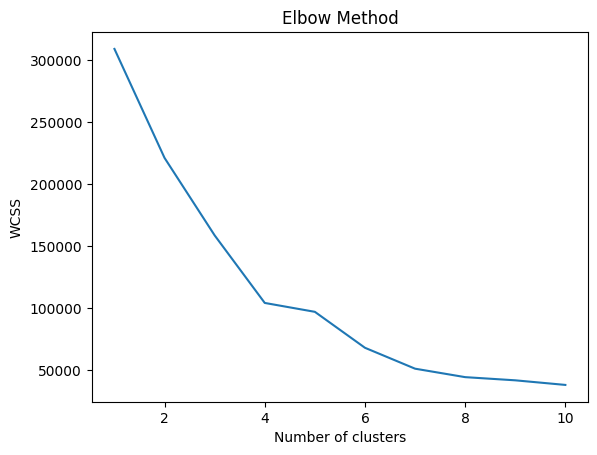

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Applying k-means with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(x)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

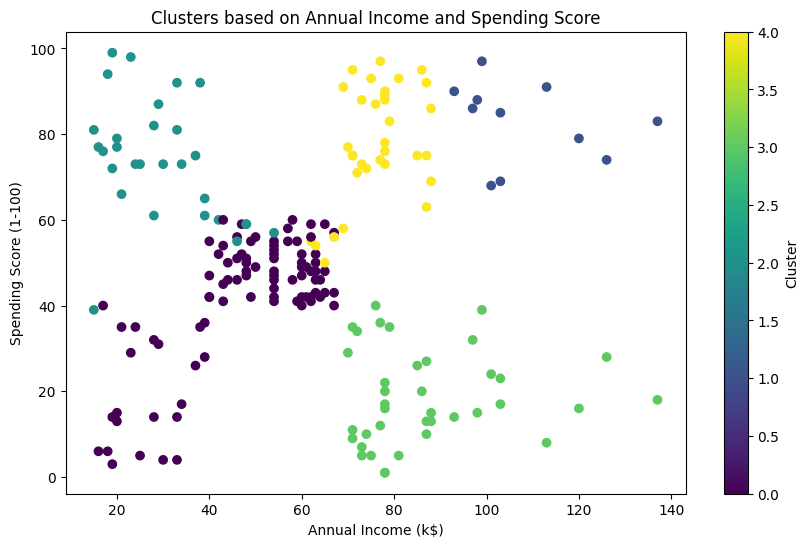

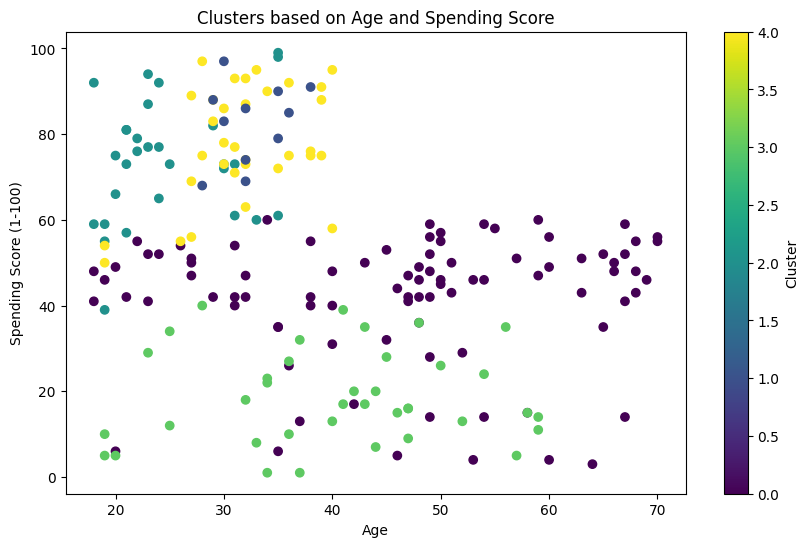

In [18]:
# Annual Income vs Spending Score
plt.figure(figsize=(10,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.title('Clusters based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

# Age vs Spending Score
plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.title('Clusters based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

In [19]:
# Cluster statistics
cluster_stats = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_stats)

# Count of customers in each cluster
print(df['Cluster'].value_counts())

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.213483           47.719101               41.797753
1        32.454545          108.181818               82.727273
2        24.689655           29.586207               73.655172
3        40.394737           87.000000               18.631579
4        31.787879           76.090909               77.757576
Cluster
0    89
3    38
4    33
2    29
1    11
Name: count, dtype: int64
